In [1]:
import pandas as pd
import numpy as np
import fourier as fourier
import normalizzation as norm
import matplotlib.pyplot as plt

In [2]:
# Specifica il percorso del file CSV
file_path = "../timeseries/B101/Channel1.csv"

# Legge il CSV e lo converte in un DataFrame
df = pd.read_csv(file_path)
df

,singleData
0,-21702628.0
1,-8657071.0
2,7671702.0
3,14368814.0
4,17132264.0
...,...
12287994,-31674332.0
12287995,-25849960.0
12287996,-7847381.5
12287997,24490868.0


In [3]:
df = norm.z_score_normalizzation(df)
display(df)

,singleData
0,-0.530004
1,-0.210097
2,0.190321
3,0.354549
4,0.422315
...,...
12287994,-0.774532
12287995,-0.631705
12287996,-0.190242
12287997,0.602764


In [4]:
df_transformed = fourier.prova2(df, 100)
display(df_transformed)

Elaborazione finestre: 100%|██████████| 122879/122879 [00:01<00:00, 97234.41it/s]


,dp[0],dp[1],dp[2],dp[3],dp[4],dp[5],dp[6],dp[7],dp[8],dp[9],...,dp[90],dp[91],dp[92],dp[93],dp[94],dp[95],dp[96],dp[97],dp[98],dp[99]
0,-0.530004,-0.210097,0.190321,0.354549,0.422315,0.482621,0.417141,0.548240,0.705127,0.963445,...,2.481645,1.581308,1.040409,0.544586,0.263710,0.006706,-0.280619,-0.319530,-0.439693,-0.550150
1,-0.656596,-0.650675,-0.527678,-0.298009,0.031722,0.472142,0.585479,0.401197,0.205809,0.024024,...,-0.702465,-0.715812,-0.605956,-0.563213,-0.580636,-0.525127,-0.599646,-0.593495,-0.637143,-0.612398
2,-0.830629,-0.824980,-0.770924,-0.678896,-0.524011,-0.493933,-0.454368,-0.425130,-0.399216,-0.446307,...,2.262000,2.325346,2.236601,1.907431,1.710470,1.621507,1.632033,1.501404,1.112417,0.977182
3,0.928915,0.912356,0.990417,0.842760,0.672109,0.746384,0.607581,0.591016,0.642105,0.612596,...,0.362683,0.353016,0.318109,0.134085,-0.209694,-0.317052,-0.366073,-0.268164,-0.334555,-0.482945
4,-0.611103,-0.880734,-1.095793,-0.982534,-0.904679,-0.873505,-0.810014,-0.561270,-0.269756,-0.099707,...,0.264284,0.255906,0.231815,0.287338,0.248466,0.208095,0.241396,0.114864,0.043490,-0.253971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122874,0.222790,-0.145946,-0.658419,-0.999370,-1.316283,-1.305500,-1.348012,-1.479388,-1.581434,-1.757020,...,0.577299,-0.885722,-1.065967,-0.529217,-0.245216,-0.211696,-0.321994,-0.522967,-0.401832,-0.006700
122875,0.426094,0.422810,-0.100770,-0.632769,-0.302165,0.495882,0.529930,0.356234,-0.342887,-1.199325,...,-0.674409,-0.501558,-0.279528,0.029304,0.328615,0.437426,0.474375,0.408624,0.188477,-0.006568
122876,-0.208188,-0.205485,-0.149989,0.047184,0.259765,0.728867,1.078091,1.001477,0.853689,0.864439,...,-0.646255,-0.527942,-0.325800,-0.178481,-0.100262,-0.236263,-0.194504,-0.036599,-0.049688,-0.103235
122877,-0.264272,-0.469268,-0.603901,-0.628897,-0.279694,0.090885,0.249345,0.251037,0.326824,0.163521,...,2.174703,1.920858,1.774701,1.665268,1.452568,0.918666,0.323593,-0.055661,-0.188828,-0.046028


In [5]:
# Prendiamo la prima riga
first_row = df_transformed.iloc[0].values  # Converting it to an array

In [6]:
# Calcoliamo la Trasformata Discreta di Fourier (DFT)
dft_result = np.fft.fft(first_row)

In [7]:
# Calcoliamo il modulo della DFT (ampiezza)
dft_magnitude = np.abs(dft_result)

In [8]:
# Calcoliamo le frequenze corrispondenti (per una sequenza di lunghezza N)
n = len(first_row)  # Numero di punti nella riga
frequencies = np.fft.fftfreq(n)  # Frequenze normalizzate (in unità di 1/N)

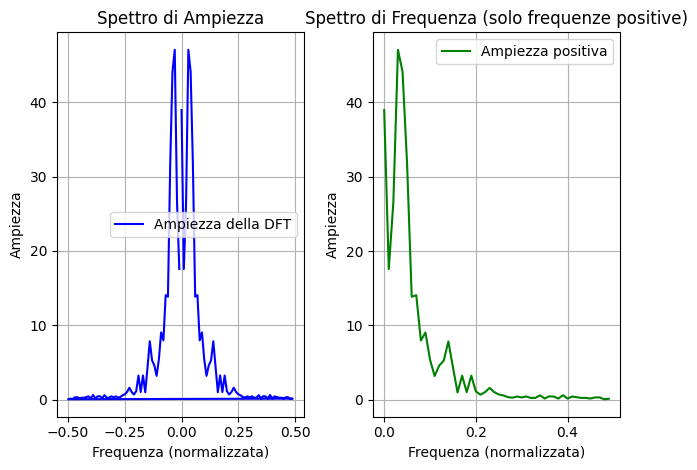

In [11]:
# Grafico per l'ampiezza della DFT
plt.subplot(1, 2, 1)
plt.plot(frequencies, dft_magnitude, label='Ampiezza della DFT', color='b')
plt.title("Spettro di Ampiezza")
plt.xlabel("Frequenza (normalizzata)")
plt.ylabel("Ampiezza")
plt.grid(True)
plt.legend()

# Grafico per lo spettro di frequenza (per visualizzare solo le frequenze positive)
plt.subplot(1, 2, 2)
plt.plot(frequencies[:n // 2], dft_magnitude[:n // 2], label='Ampiezza positiva', color='g')
plt.title("Spettro di Frequenza (solo frequenze positive)")
plt.xlabel("Frequenza (normalizzata)")
plt.ylabel("Ampiezza")
plt.grid(True)
plt.legend()

# Mostriamo il grafico
plt.tight_layout()
plt.show()